In [ ]:
# 0501.py
import cv2
import numpy as np
src = cv2.imread('./data/heart10.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imshow('src',  src)

ret, dst = cv2.threshold(src, 120, 255, cv2.THRESH_BINARY)
print('ret=', ret)
cv2.imshow('dst',  dst)

ret2, dst2 = cv2.threshold(src, 200, 255,
                             cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print('ret2=', ret2)
cv2.imshow('dst2',  dst2)

cv2.waitKey()    
cv2.destroyAllWindows()


In [ ]:
# 0502.py
import cv2
import numpy as np
src = cv2.imread('./data/srcThreshold.png', cv2.IMREAD_GRAYSCALE)
cv2.imshow('src',  src)

ret, dst = cv2.threshold(src, 0, 255,
                             cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2.imshow('dst',  dst)

dst2 = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                            cv2.THRESH_BINARY, 51, 7)
cv2.imshow('dst2',  dst2)

dst3 = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                            cv2.THRESH_BINARY, 51, 7)
cv2.imshow('dst3',  dst3)

cv2.waitKey()    
cv2.destroyAllWindows()


In [ ]:
# 0503.py
import cv2
import numpy as np

src = np.array([[0, 0, 0, 0],
              [1, 1, 3, 5],
              [6, 1, 1, 3],
              [4, 3, 1, 7]
              ], dtype=np.uint8)

hist1 = cv2.calcHist(images=[src], channels=[0], mask=None,
                    histSize=[4], ranges=[0, 8])
print('hist1 = ', hist1)

hist2 = cv2.calcHist(images=[src], channels=[0], mask=None,
                    histSize=[4], ranges=[0, 4])
print('hist2 = ', hist2)


In [ ]:
# 0504.py
import cv2
import numpy as np
from   matplotlib import pyplot as plt

src = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)

hist1 = cv2.calcHist(images=[src], channels=[0], mask=None,
                    histSize=[32], ranges=[0, 256])

hist2 = cv2.calcHist(images=[src], channels=[0], mask=None,
                    histSize=[256], ranges=[0, 256])
#1
hist1 = hist1.flatten()
hist2 = hist2.flatten()

#2
plt.title('hist1: binX = np.arange(32)')
plt.plot(hist1, color='r')
binX = np.arange(32)

plt.bar(binX, hist1, width=1, color='b')
plt.show()

#3
plt.title('hist1: binX = np.arange(32)*8')
binX = np.arange(32)*8
plt.plot(binX, hist1, color='r')
plt.bar(binX, hist1, width=8, color='b')
plt.show()

#4
plt.title('hist2: binX = np.arange(256)')
plt.plot(hist2, color='r')
binX = np.arange(256)
plt.bar(binX, hist2, width=1, color='b')
plt.show()


In [ ]:
# 0505.py
import cv2
import numpy as np
from   matplotlib import pyplot as plt

src = cv2.imread('./data/lena.jpg')
histColor = ('b', 'g', 'r')
for i in range(3):
    hist = cv2.calcHist(images=[src], channels=[i], mask=None,
                    histSize=[256], ranges=[0, 256])
    plt.plot(hist, color = histColor[i])    
plt.show()


In [ ]:
# 0506.py
import cv2
from   matplotlib import pyplot as plt

bgr = cv2.imread('./data/lena.jpg')
##hsv    = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

#1
hist01 = cv2.calcHist([bgr], [0,1], None,
	[32, 32], [0, 256, 0, 256])
##cv2.normalize(hist01, hist01, 0, 1, cv2.NORM_MINMAX)
##fig = plt.figure()
##fig.canvas.set_window_title('2D Histogram')

plt.title('hist01')
plt.ylim(0, 31)
plt.imshow(hist01, interpolation = "nearest")
plt.show()

#2
hist02 = cv2.calcHist([bgr], [0,2], None,
	[32, 32], [0, 256, 0, 256])
plt.title('hist02')
plt.ylim(0, 31)
plt.imshow(hist02, interpolation = "nearest")
plt.show()

#3
hist12 = cv2.calcHist([bgr], [1,2], None,
	[32, 32], [0, 256, 0, 256])
plt.title('hist12')
plt.ylim(0, 31)
plt.imshow(hist02, interpolation = "nearest")
plt.show()


In [ ]:
# 0507.py
import cv2
import numpy as np

src = np.array([[0, 0, 0, 0],
                [1, 1, 3, 5],
                [6, 1, 1, 3],
                [4, 3, 1, 7]
              ], dtype=np.uint8)

dst = cv2.equalizeHist(src)
print('dst =', dst)


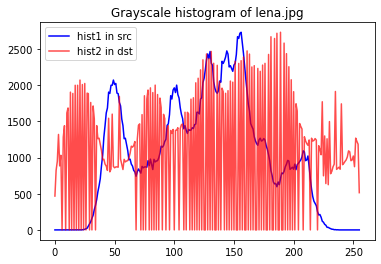

In [2]:
# 0508.py
import cv2
import numpy as np
from   matplotlib import pyplot as plt

src = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)
dst = cv2.equalizeHist(src)
cv2.imshow('dst',  dst)
cv2.waitKey()    
cv2.destroyAllWindows()

plt.title('Grayscale histogram of lena.jpg')

hist1 = cv2.calcHist(images=[src], channels=[0], mask=None,
                    histSize=[256], ranges=[0, 256])
plt.plot(hist1, color='b', label='hist1 in src')

hist2 = cv2.calcHist(images=[dst], channels=[0], mask=None,
                    histSize=[256], ranges=[0, 256])
plt.plot(hist2, color='r', alpha=0.7, label='hist2 in dst')
plt.legend(loc='best')
plt.show()


In [3]:
# 0509.py
import cv2
import numpy as np

src = cv2.imread('./data/lena.jpg')
cv2.imshow('src',  src)

#1
hsv    = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

v2 = cv2.equalizeHist(v)
hsv2 = cv2.merge([h, s, v2])
dst    = cv2.cvtColor(hsv2, cv2.COLOR_HSV2BGR)
cv2.imshow('dst',  dst)

#2
yCrCv = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
y, Cr, Cv = cv2.split(yCrCv)

y2 = cv2.equalizeHist(y)
yCrCv2 = cv2.merge([y2, Cr, Cv])
dst2    = cv2.cvtColor(yCrCv2, cv2.COLOR_YCrCb2BGR)

cv2.imshow('dst2',  dst2)
cv2.waitKey()    
cv2.destroyAllWindows()


In [4]:
# 0510.py
import cv2
import numpy as np

src = np.array([[0, 0, 0, 0],
              [1, 1, 3, 5],
              [6, 1, 1, 3],
              [4, 3, 1, 7]
              ], dtype=np.uint8)

hist = cv2.calcHist(images=[src], channels=[0], mask=None,
                    histSize=[4], ranges=[0, 8])
print('hist = ', hist)

backP = cv2.calcBackProject([src], [0], hist, [0, 8], scale=1)
print('backP = ', backP)


hist =  [[9.]
 [3.]
 [2.]
 [2.]]
backP =  [[9 9 9 9]
 [9 9 3 2]
 [2 9 9 3]
 [2 3 9 2]]


In [5]:
# 0511.py
import cv2
import numpy as np

#1
src = cv2.imread('./data/fruits.jpg')
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

#2
roi = cv2.selectROI(src)
print('roi =', roi)
roi_h = h[roi[1]:roi[1]+roi[3], roi[0]:roi[0]+roi[2]]
hist = cv2.calcHist([roi_h], [0], None,[64], [0, 256])
backP= cv2.calcBackProject([h.astype(np.float32)], [0], hist,[0, 256],scale=1.0)
##minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(backP)
##T = maxVal -1 # threshold

#3
hist = cv2.sort(hist, cv2.SORT_EVERY_COLUMN+cv2.SORT_DESCENDING)
k = 1 
T = hist[k][0] -1 # threshold
print('T =', T)
ret, dst = cv2.threshold(backP, T, 255, cv2.THRESH_BINARY)

cv2.imshow('dst',  dst)
cv2.waitKey()    
cv2.destroyAllWindows()


roi = (143, 142, 288, 249)
T = 13477.0


d1(H1, H2, CORREL) = 0.5745400493684614
d2(H1, H2, CHISQR)= 65.51618474756889
d3(H1, H2, INTERSECT)= 0.49012999055776163
d4(H1, H2, BHATTACHARYYA)= 0.4875887569545638


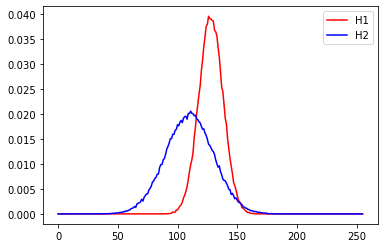

In [6]:
# 0512.py
import cv2
import numpy as np
import time
from   matplotlib import pyplot as plt

#1
nPoints = 100000
pts1 = np.zeros((nPoints, 1), dtype=np.uint16)
pts2 = np.zeros((nPoints, 1), dtype=np.uint16)

cv2.setRNGSeed(int(time.time()))
cv2.randn(pts1, mean=(128), stddev=(10))
cv2.randn(pts2, mean=(110), stddev=(20))            

#2
H1 = cv2.calcHist(images=[pts1], channels=[0], mask=None,
                    histSize=[256], ranges=[0, 256])
cv2.normalize(H1, H1, 1, 0, cv2.NORM_L1)
plt.plot(H1, color='r', label='H1')

H2 = cv2.calcHist(images=[pts2], channels=[0], mask=None,
                    histSize=[256], ranges=[0, 256])
cv2.normalize(H2, H2, 1, 0, cv2.NORM_L1)

#3
d1 = cv2.compareHist(H1, H2, cv2.HISTCMP_CORREL)
d2 = cv2.compareHist(H1, H2, cv2.HISTCMP_CHISQR)
d3 = cv2.compareHist(H1, H2, cv2.HISTCMP_INTERSECT)
d4 = cv2.compareHist(H1, H2, cv2.HISTCMP_BHATTACHARYYA)
print('d1(H1, H2, CORREL) =',       d1)
print('d2(H1, H2, CHISQR)=',        d2)
print('d3(H1, H2, INTERSECT)=',     d3)
print('d4(H1, H2, BHATTACHARYYA)=', d4)

plt.plot(H2, color='b', label='H2')
plt.legend(loc='best')
plt.show()


EMD(S1, S2, DIST_L1) = 18.393850326538086
EMD(S1, S2, DIST_L2) = 18.393850326538086
EMD(S1, S2, DIST_C) = 18.393850326538086


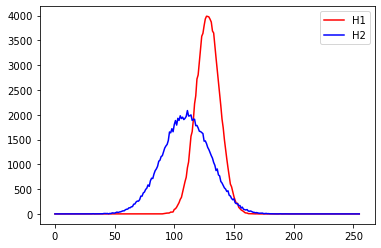

In [7]:
# 0513.py
import cv2
import numpy as np
import time
from   matplotlib import pyplot as plt

#1
nPoints = 100000
pts1 = np.zeros((nPoints, 1), dtype=np.uint16)
pts2 = np.zeros((nPoints, 1), dtype=np.uint16)

cv2.setRNGSeed(int(time.time()))
cv2.randn(pts1, mean=(128), stddev=(10))
cv2.randn(pts2, mean=(110), stddev=(20))            

#2
H1 = cv2.calcHist(images=[pts1], channels=[0], mask=None,
                    histSize=[256], ranges=[0, 256])
##cv2.normalize(H1, H1, norm_type=cv2.NORM_L1)

H2 = cv2.calcHist(images=[pts2], channels=[0], mask=None,
                    histSize=[256], ranges=[0, 256])
##cv2.normalize(H2, H2, norm_type=cv2.NORM_L1)

#3
S1 = np.zeros((H1.shape[0], 2), dtype=np.float32)
S2 = np.zeros((H1.shape[0], 2), dtype=np.float32)
##S1[:, 0] = H1[:, 0]
##S2[:, 0] = H2[:, 0]
for i in range(S1.shape[0]):
    S1[i, 0] = H1[i,0]
    S2[i, 0] = H2[i,0]
    S1[i, 1] = i
    S2[i, 1] = i

emd1, lowerBound, flow = cv2.EMD(S1, S2, cv2.DIST_L1)
print('EMD(S1, S2, DIST_L1) =',  emd1)

emd2, lowerBound, flow = cv2.EMD(S1, S2, cv2.DIST_L2)
print('EMD(S1, S2, DIST_L2) =',  emd2)

emd3, lowerBound, flow = cv2.EMD(S1, S2, cv2.DIST_C) 
print('EMD(S1, S2, DIST_C) =',  emd3)

plt.plot(H1, color='r', label='H1')
plt.plot(H2, color='b', label='H2')
plt.legend(loc='best')
plt.show()
